In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(321)

# 이미지 크기를 128 x 128 로 조정합니다
IMAGE_SIZE = 128

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(321)

In [3]:
original_dataset=ImageFolder(root='CNN/data/flower_photos/',
                             transform=transforms.Compose([
                               transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                               transforms.ToTensor()
                             ]))

In [4]:
type(original_dataset)

torchvision.datasets.folder.ImageFolder

In [5]:
original_loader=DataLoader(original_dataset,
                           batch_size=100,
                           shuffle=True,
                           num_workers=1)

In [6]:
# 전체 이미지를 추출한다.
original_images, labels = next(iter(original_loader))

# 이미지의 shape을 확인합니다. 224 X 224 RGB 이미지 임을 확인합니다.
# (batch_size, channel, height, width)
print(original_images.shape)

torch.Size([100, 3, 128, 128])


In [7]:
labels

tensor([4, 3, 4, 4, 3, 0, 0, 0, 1, 4, 1, 4, 1, 4, 1, 2, 0, 1, 1, 3, 1, 3, 0, 1,
        4, 0, 1, 2, 1, 1, 4, 3, 4, 1, 3, 0, 2, 1, 1, 1, 3, 4, 3, 3, 2, 2, 1, 1,
        1, 1, 2, 3, 0, 4, 0, 1, 2, 3, 2, 3, 4, 1, 2, 2, 1, 0, 2, 0, 2, 0, 3, 0,
        1, 0, 3, 1, 1, 2, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3, 0, 0, 0, 0, 0, 2, 4, 1,
        1, 3, 4, 4])

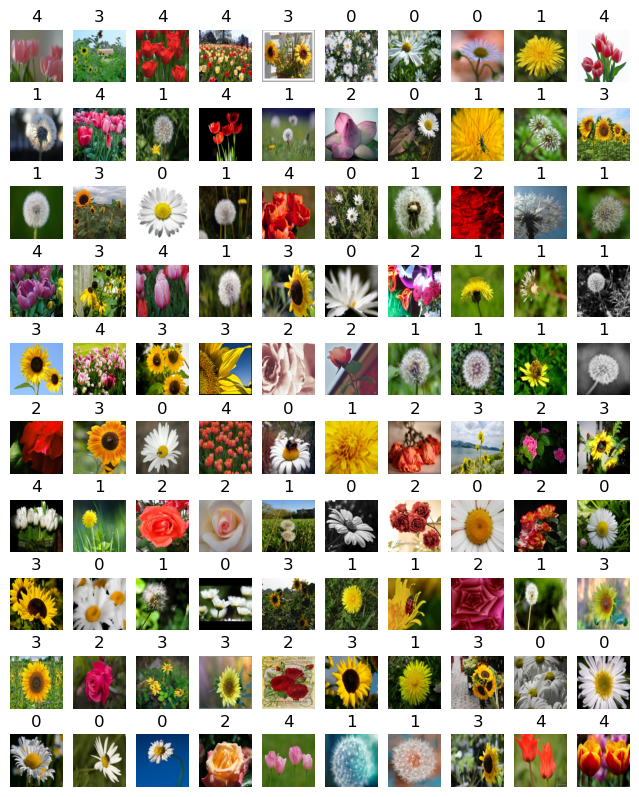

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.title(labels[i].item())
  plt.imshow(original_image[i].permute(1,2,0))  # [chanel, row, col] => [row, col, chanel]
  plt.axis('off')
plt.show()


In [10]:
def create_loader(transform):
  transform_dataset=ImageFolder(root='data/flower_photos',
                                transform=transform)
  transform_loader=DataLoader(transform_dataset,
                              batch_size=100,
                              shuffle=True,
                              num_workers=1)
  
  transform_images, labels=next(iter(transform_loader))
  fig, axes=plt.subplot(3,2)
  fig.set_size_inches(4,6)

  for idx in range(3):
    axes[idx, 0].imshow(original_image[idx].permute(1,2,0))